#__User-Based Collaborative Filtering__

Let's explore how to create collaborative filtering based on users.



## Step 1: Import Required Libraries

- Import pandas, NumPy, scipy.stats, seaborn, and cosine_similarity
- Import Matplotlib for visualization


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## Step 2: Load and Preprocess the Data

- Read the CSV files containing the anime and rating data
- Filter the ratings data
- Check the number of ratings, unique users, and unique animes


- We are using 2 datasets here: 
1.   anime
2.   rating



In [ ]:
animes = pd.read_csv('anime.csv')

In [ ]:
ratings = pd.read_csv('rating.csv')

- In rating, we have a few people who did not rate.
- Let's not consider that.

In [ ]:
ratings = ratings[ratings.rating != -1]
ratings.head()

,user_id,anime_id,rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0


__Observations:__
- Here, you can see a few rows from the rating data.
- The fields are user_id, anime_id, and rating.

In [ ]:
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


__Observations:__
- Here, you can see the top five observations about anime.
- The fields are anime_id, name, genre, type, episodes, rating, and members.

## Step 3: Data Exploration

- Calculate and visualize the average number of anime rated per user
- Calculate and visualize the average number of ratings given per anime


In [ ]:
len(ratings)

509577

__Observation:__
- The length of the rating is 509577.

In [ ]:
len(ratings['user_id'].unique())

5726

__Observation:__
- There are 5726 old users.

In [ ]:
len(animes['anime_id'].unique())

12294

__Observation:__
- There are 12294 unique anime IDs.
- Import statistics
- Group by ratings per user

In [ ]:
import statistics
ratings_per_user = ratings.groupby('user_id')['rating'].count()
statistics.mean(ratings_per_user.tolist())

88.99336360461055

__Observation:__
- On average, there are 88 ratings per user.

Create a per-user rating histogram

<Axes: >

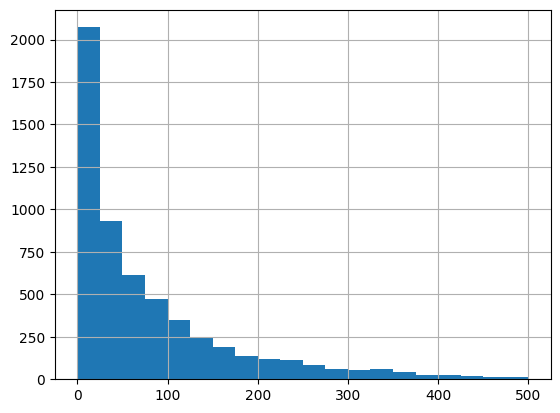

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_user.hist(bins=20, range=(0,500))

__Observations:__
- Here, we can see the histogram based on rating per user using 20 bins.
- It is clear from the histogram that the first bin has a higher value.



Now, let's check the rating per anime.

In [ ]:
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()
statistics.mean(ratings_per_anime.tolist())

72.07581329561528

__Observation:__
- The average rating per anime is 72.075.

<Axes: >

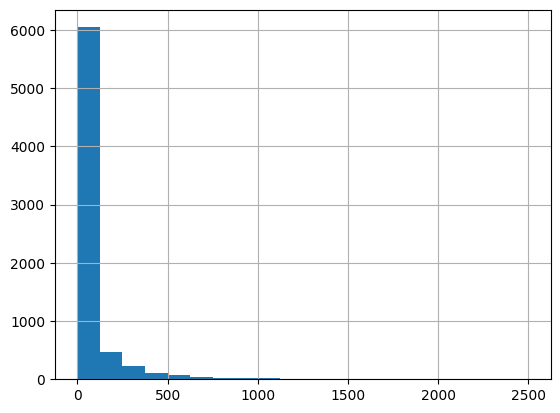

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_anime.hist(bins=20, range=(0,2500))

__Observation:__
- Here, we can see the histogram based on rating per anime using 20 bins.

Create a DataFrame per anime and a filter
  - Filter ratings greater than 1000 to find a popular anime

In [ ]:
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)

filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]

popular_anime = filtered_ratings_per_anime_df.index.tolist()

Create ratings per user DataFrame
  - Filter the ratings greater than 500 and create an index to list prolific users

In [ ]:
ratings_per_user_df = pd.DataFrame(ratings_per_user)

filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 500]

prolific_users = filtered_ratings_per_user_df.index.tolist()

## Step 4: Filtering the Data

- Filter the data based on the number of ratings per user and per anime
- Create a pivot table from the filtered data
- Fill NaN values with 0 in the rating matrix

In [ ]:
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime)]
filtered_ratings = ratings[ratings.user_id.isin(prolific_users)]
len(filtered_ratings)

65024

In [ ]:
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')
rating_matrix = rating_matrix.fillna(0)
rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,33741,33798,33902,33934,33964,34085,34103,34136,34240,34283
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0


__Observation:__
- The anime and user ID details are displayed above.

## Step 5: Define the similar_users Function

- Define a function to find similar_users based on the cosine similarity of their rating vectors

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, k=3):
    user = matrix[matrix.index == user_id]
    
    other_users = matrix[matrix.index != user_id]
    
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    indices = other_users.index.tolist()
    
    index_similarity = dict(zip(indices, similarities))
    
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1))
    index_similarity_sorted.reverse()
    
    top_users_similarities = index_similarity_sorted[:k]
    users = [u[0] for u in top_users_similarities]
    
    return users

## Step 6: Test the similar_users Function

- Test the `similar_users` function with a sample user ID


In [ ]:
current_user = 226
similar_user_indices = similar_users(current_user, rating_matrix)
print(similar_user_indices)

[3203, 5672, 2297]


__Observation:__
- Here, we have similar indices.

## Step 7: Define the recommend_item Function

- Define a function to recommend items (animes) for a user based on the average ratings of similar users
- Test the `recommend_item` function with a sample user ID and the similar user indices obtained in Step 6


In [ ]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
   
    similar_users = similar_users.mean(axis=0)
    
    similar_users_df = pd.DataFrame(similar_users, columns=['mean'])
    
    user_df = matrix[matrix.index == user_index]

    user_df_transposed = user_df.transpose()
   
    user_df_transposed.columns = ['rating']
    
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
   
    animes_unseen = user_df_transposed.index.tolist()
    
  
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(animes_unseen)]
 
    similar_users_df_ordered = similar_users_df.sort_values(by=['mean'], ascending=False)
   
    top_n_anime = similar_users_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()

    anime_information = animes[animes['anime_id'].isin(top_n_anime_indices)]
    
    return anime_information

recommend_item(226, similar_user_indices, rating_matrix)

,anime_id,name,genre,type,episodes,rating,members
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690
374,17265,Log Horizon,"Action, Adventure, Fantasy, Game, Magic, Shounen",TV,25,8.14,387100
1348,8676,Amagami SS,"Comedy, Romance, School, Slice of Life",TV,25,7.57,157223
1442,15583,Date A Live,"Comedy, Harem, Mecha, Romance, School, Sci-Fi",TV,12,7.54,301358


__Observation:__

The recommendations shown above were given to the user.